# Imports

In [1]:
from requests import get
from bs4 import BeautifulSoup
import os
from time import sleep
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import json
from wordcloud import WordCloud
import numpy as np
import pprint as pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

## Data Acquisition

### Acquiring a list of movies.
100 Most Popular Movies on IMDb.

In [2]:
url = '''https://www.imdb.com/chart/moviemeter?ref_=nv_mv_mpm'''
response = get(url)

In [3]:
print(response.text[:400])




<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    
    
    

    
    
    

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">
            <style>
                body#styleguide


In [4]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [5]:
# see also `soup.find_all`

messy_movies = soup.find_all('td', class_='titleColumn')

In [6]:
len(messy_movies)

100

In [7]:
movies = []
trigger1 = []
for movie in messy_movies:
    movie_title = movie.find('a').text.lower().replace(' ', '%20')
    movies.append(re.sub(r"[^a-z0-9%\s]", '', movie_title))
    trigger1.append(False)
movies

['spiderman%20far%20from%20home',
 'midsommar',
 'mulan',
 'the%20lion%20king',
 'once%20upon%20a%20time%20%20in%20hollywood',
 'toy%20story%204',
 'avengers%20endgame',
 'alita%20battle%20angel',
 'hellboy',
 'crawl',
 'yesterday',
 'bohemian%20rhapsody',
 'spiderman%20into%20the%20spiderverse',
 'after',
 'stuber',
 'annabelle%20comes%20home',
 'the%20little%20mermaid',
 'john%20wick%20chapter%203%20%20parabellum',
 'aladdin',
 'maleficent%20mistress%20of%20evil',
 'shazam',
 'rocketman',
 'spiderman%20homecoming',
 'shaft',
 'super%2030',
 'dora%20and%20the%20lost%20city%20of%20gold',
 'murder%20mystery',
 'fast%20%20furious%20presents%20hobbs%20%20shaw',
 'knives%20out',
 'hereditary',
 'captain%20marvel',
 'grown%20ups',
 'charlies%20angels',
 'it%20chapter%20two',
 'joker',
 'anna',
 'the%20lion%20king',
 'us',
 'point%20blank',
 'childs%20play',
 'mary%20poppins%20returns',
 'pet%20sematary',
 'mulan',
 'men%20in%20black%20international',
 'star%20wars%20the%20rise%20of%20skywal

### Acquiring a list of movies with triggers.

In [8]:
url = '''https://istheresuicideinit.tumblr.com/post/116009541869/films'''
response = get(url)

In [9]:
soup = BeautifulSoup(response.content, 
#                     'lxml')
                    'html.parser')

In [10]:
# see also `soup.find_all`

trigger_movies = soup.find('ul')
trigger_movies.find_all('li')

[<li>2:37 (2006)</li>,
 <li>3 idiots (2009)</li>,
 <li>28 days later (2002)</li>,
 <li>47 ronin (2013)</li>,
 <li>1408 (2007)</li>,
 <li>a clockwork orange (1971)</li>,
 <li>airplane! (1980)</li>,
 <li>almost famous (2000)</li>,
 <li>a long way down (2014)</li>,
 <li>always watching: a marble hornets story (2015)</li>,
 <li>a mother’s nightmare (2012)</li>,
 <li>an american werewolf in london (1981)</li>,
 <li>annabelle (2014)</li>,
 <li>anchorman 2: the legend continues (2013)</li>,
 <li>archie’s final project (2011)</li>,
 <li>arizona dream (1992) </li>,
 <li>as above, so below (2014)</li>,
 <li>a single man (2009)</li>,
 <li>a streetcar named desire (1951, 1984, 1987)</li>,
 <li>battle royale (2000)</li>,
 <li>before I disappear (2014)</li>,
 <li>ben x (2007)</li>,
 <li>better off dead (1985)</li>,
 <li>birdman: or (the unexpected virtue of ignorance) (2014)</li>,
 <li>blackbird (2014)</li>,
 <li>black swan (2010)</li>,
 <li>boogie nights (1997)</li>,
 <li>boogeyman 2 (2007)</li>,
 

In [11]:
for trigger_movie in trigger_movies:
    title = trigger_movie.text
    movie_title = re.sub(r' \(\d{4}\)$', '', title)
    movie_title = movie_title.replace(' ', '%20')
    movie_title = re.sub(r"[^\w%]", '', movie_title)
    print(movie_title)

237
3%20idiots
28%20days%20later
47%20ronin
1408
a%20clockwork%20orange
airplane
almost%20famous
a%20long%20way%20down
always%20watching%20a%20marble%20hornets%20story
a%20mothers%20nightmare
an%20american%20werewolf%20in%20london
annabelle
anchorman%202%20the%20legend%20continues
archies%20final%20project
arizona%20dream%201992
as%20above%20so%20below
a%20single%20man
a%20streetcar%20named%20desire%201951%201984%201987
battle%20royale
before%20I%20disappear
ben%20x
better%20off%20dead
birdman%20or%20the%20unexpected%20virtue%20of%20ignorance
blackbird
black%20swan
boogie%20nights
boogeyman%202
casino%20royale
carrie
charlie%20bartlett
chatroom
cloud%20atlas%202012
constantine
cozy%20dens%20czech%20Pelíšky
cyberbully
cyberbully
dead%20poets%20society
dear%20lemon%20lima
detachment%20211
die%20welle%20german
disconnect
divergent
donnie%20darko%202001
edge%20of%20tomorrow
elephant%20song
elizabethtown
ex%20machina
fame
fight%20club
filth
final%20destination%202
forrest%20gump
frank
full%

In [12]:
trigger_movies_list = []
trigger2 = []
for trigger_movie in trigger_movies:
    movie_title = trigger_movie.text
    movie_title = re.sub(r' \(\d{4}\)$', '', movie_title)
    movie_title = movie_title.replace(' ', '%20')
    movie_title = re.sub(r"[^\w%]", '', movie_title)
    trigger_movies_list.append(movie_title)
    trigger2.append(True)
trigger_movies_list

['237',
 '3%20idiots',
 '28%20days%20later',
 '47%20ronin',
 '1408',
 'a%20clockwork%20orange',
 'airplane',
 'almost%20famous',
 'a%20long%20way%20down',
 'always%20watching%20a%20marble%20hornets%20story',
 'a%20mothers%20nightmare',
 'an%20american%20werewolf%20in%20london',
 'annabelle',
 'anchorman%202%20the%20legend%20continues',
 'archies%20final%20project',
 'arizona%20dream%201992',
 'as%20above%20so%20below',
 'a%20single%20man',
 'a%20streetcar%20named%20desire%201951%201984%201987',
 'battle%20royale',
 'before%20I%20disappear',
 'ben%20x',
 'better%20off%20dead',
 'birdman%20or%20the%20unexpected%20virtue%20of%20ignorance',
 'blackbird',
 'black%20swan',
 'boogie%20nights',
 'boogeyman%202',
 'casino%20royale',
 'carrie',
 'charlie%20bartlett',
 'chatroom',
 'cloud%20atlas%202012',
 'constantine',
 'cozy%20dens%20czech%20Pelíšky',
 'cyberbully',
 'cyberbully',
 'dead%20poets%20society',
 'dear%20lemon%20lima',
 'detachment%20211',
 'die%20welle%20german',
 'disconnect',
 '

In [13]:
len(trigger_movies_list)

159

In [14]:
trigger1.extend(trigger2)
len(trigger1)

259

In [15]:
movies.extend(trigger_movies_list)

### Scraping tweets from Twitter.

In [16]:
browser = webdriver.Chrome()
# print('Connecting to Twitter')


tweets = []
tweets_movie_title = []
tweets_trigger = []


for movie, trigger in list(zip(movies, trigger1)):
    # print(f'Looking up {movie}')
    browser.get(f"https://twitter.com/search?q={movie}%20trigger&src=typd")
    # time.sleep(1)

    elem = browser.find_element_by_tag_name("body")

    no_of_pagedowns = 18
    # print('Scrolling thru page.')

    while no_of_pagedowns:
        elem.send_keys(Keys.PAGE_DOWN)
        # time.sleep(0.2)
        no_of_pagedowns-=1

    post_elems = browser.find_elements_by_class_name("js-tweet-text-container")
    # print('Grabbing Tweets.')

    for post in post_elems:
        tweets.append(post.text)
        tweets_movie_title.append(movie)
        tweets_trigger.append(trigger)
    # print('Completed.')

In [17]:
df = pd.DataFrame({'title':tweets_movie_title, 'tweet':tweets, 'trigger_scene':tweets_trigger})
df.head()

,title,tweet,trigger_scene
0,spiderman%20far%20from%20home,spiderman far from home had a joke where peter...,False
1,spiderman%20far%20from%20home,Trigger warning for all photographers before s...,False
2,spiderman%20far%20from%20home,so i just finished watching spiderman far from...,False
3,spiderman%20far%20from%20home,Spiderman: Far From Home was a gaslighting tri...,False
4,spiderman%20far%20from%20home,it trigger me every time there's a spiderman f...,False


## Data Preparation

##### Fixing title column.

In [18]:
df.title = df.title.str.replace('%20', '_')
df.head()

,title,tweet,trigger_scene
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False


##### Lowercasing the text.

In [19]:
df['cleaned_text'] = df.tweet.str.lower()
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman: far from home was a gaslighting tri...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time there's a spiderman f...


##### Converting and standardizing accented characters into ASCII characters.

In [20]:
def replace_accented_characters(text):
    no_accent_text = unicodedata.normalize('NFKD', text)\
                        .encode('ascii', 'ignore')\
                        .decode('utf-8', 'ignore')
    return no_accent_text

df.cleaned_text = df.cleaned_text.apply(replace_accented_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman: far from home was a gaslighting tri...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time there's a spiderman f...


##### Removing special characters.

In [21]:
# remove anything that is not a through z, a number, a single quote, or whitespace
def remove_special_characters(text):
    no_special_text = re.sub(r"[^a-z0-9\s]", '', text)
    return no_special_text

df.cleaned_text = df.cleaned_text.apply(remove_special_characters)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...


##### Tokenization

In [22]:
def tokenize_text(text):
    tokenizer = nltk.tokenize.ToktokTokenizer()
    return tokenizer.tokenize(text, return_str=True)

df.cleaned_text = df.cleaned_text.apply(tokenize_text)
df.head()

,title,tweet,trigger_scene,cleaned_text
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...


##### Stemming

In [23]:
# Create the nltk stemmer object, then use it
def stemmer(text):
    ps = nltk.porter.PorterStemmer()
    stemmed_list = [ps.stem(word) for word in text.split()]
    stemmed_text = ' '.join(stemmed_list)
    return stemmed_text

df['stemmed_text'] = df.cleaned_text.apply(stemmer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...


In [24]:
pd.Series(' '.join(df.stemmed_text).split()).value_counts().head(10)

the        3252
trigger    2855
a          1865
to         1729
and        1440
i          1401
of         1153
it         1021
in          949
is          893
dtype: int64

##### Lemmatizing

In [25]:
def lemmatizer(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized_list = [wnl.lemmatize(word) for word in text.split()]
    lemmatized_text = ' '.join(lemmatized_list)
    return lemmatized_text

df['lemmatized_text'] = df.cleaned_text.apply(lemmatizer)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...,spiderman far from home wa a gaslighting trigg...
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...,it trigger me every time there a spiderman far...


In [26]:
pd.Series(' '.join(df.lemmatized_text).split()).value_counts().head(10)

the        3252
trigger    2824
a          2108
to         1729
and        1440
i          1401
of         1153
it         1021
in          949
is          893
dtype: int64

##### Removing stopwords

In [27]:
stopwords_to_add = ' '.join(movies).replace('%20', ' ').split()
stopwords_to_add[:20]
stopwords_to_add.extend(['trigger'])

In [28]:
stopword_list = stopwords.words('english')

stopword_list.remove('no')
stopword_list.remove('not')

stopword_list.extend(stopwords_to_add)

# stopword_list.remove('warning')
stopword_list.remove('suicide')
stopword_list.remove('suicides')

print('warning' in stopword_list)

stopword_list[:10]

False


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [w for w in words if w not in stopword_list]
    text_without_stopwords = ' '.join(filtered_words)
    return text_without_stopwords

df['lemmatized_no_stopwords'] = df.lemmatized_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...,joke peter mistake acdc led zeppelin triggered...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,warning photographer seeing
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...,finished loved im car hearing fever got confus...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...,spiderman far from home wa a gaslighting trigg...,wa gaslighting half aint nobody warned
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...,it trigger me every time there a spiderman far...,every trailer tv start nowhere playing tom hol...


In [30]:
pd.Series(' '.join(df.lemmatized_no_stopwords).split()).value_counts().head()

warning    460
wa         376
like       317
movie      286
pull       264
dtype: int64

In [31]:
df['stemmed_no_stopwords'] = df.stemmed_text.apply(remove_stopwords)
df.head()

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords,stemmed_no_stopwords
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...,joke peter mistake acdc led zeppelin triggered...,joke peter mistak acdc led zeppelin ptsd becau...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,warning photographer seeing,warn photograph befor see
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...,finished loved im car hearing fever got confus...,finish watch im car hear fever got confus bc t...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...,spiderman far from home wa a gaslighting trigg...,wa gaslighting half aint nobody warned,wa gaslight half aint nobodi warn
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...,it trigger me every time there a spiderman far...,every trailer tv start nowhere playing tom hol...,everi trailer tv start nowher tom holland cri ...


In [32]:
pd.Series(' '.join(df.stemmed_no_stopwords).split()).value_counts().head()

warn    478
pull    431
thi     420
wa      376
like    335
dtype: int64

In [89]:
# df.to_csv('trigger_warning_tweets.csv')

In [93]:
# df = pd.read_csv('trigger_warning_tweets.csv', index_col=0)

,title,tweet,trigger_scene,cleaned_text,stemmed_text,lemmatized_text,lemmatized_no_stopwords,stemmed_no_stopwords
0,spiderman_far_from_home,spiderman far from home had a joke where peter...,False,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...,spiderman far from home had a joke where peter...,joke peter mistake acdc led zeppelin triggered...,joke peter mistak acdc led zeppelin ptsd becau...
1,spiderman_far_from_home,Trigger warning for all photographers before s...,False,trigger warning for all photographers before s...,trigger warn for all photograph befor see spid...,trigger warning for all photographer before se...,warning photographer seeing,warn photograph befor see
2,spiderman_far_from_home,so i just finished watching spiderman far from...,False,so i just finished watching spiderman far from...,so i just finish watch spiderman far from home...,so i just finished watching spiderman far from...,finished loved im car hearing fever got confus...,finish watch im car hear fever got confus bc t...
3,spiderman_far_from_home,Spiderman: Far From Home was a gaslighting tri...,False,spiderman far from home was a gaslighting trig...,spiderman far from home wa a gaslight trigger ...,spiderman far from home wa a gaslighting trigg...,wa gaslighting half aint nobody warned,wa gaslight half aint nobodi warn
4,spiderman_far_from_home,it trigger me every time there's a spiderman f...,False,it trigger me every time theres a spiderman fa...,it trigger me everi time there a spiderman far...,it trigger me every time there a spiderman far...,every trailer tv start nowhere playing tom hol...,everi trailer tv start nowher tom holland cri ...
5,spiderman_far_from_home,the gaslighting and anxiety spiderman had made...,False,the gaslighting and anxiety spiderman had made...,the gaslight and anxieti spiderman had made me...,the gaslighting and anxiety spiderman had made...,gaslighting anxiety made cry lot fuckkkkkkkk t...,gaslight anxieti made cri lot fuckkkkkkkk onli...
6,spiderman_far_from_home,#SpiderMan writers were scared to pull the tri...,False,spiderman writers were scared to pull the trig...,spiderman writer were scare to pull the trigge...,spiderman writer were scared to pull the trigg...,writer scared pull big reveal forever change p...,writer scare pull big reveal forev chang peter...
7,midsommar,"#Midsommar right ladies, this film deffo shoul...",False,midsommar right ladies this film deffo should ...,midsommar right ladi thi film deffo should hav...,midsommar right lady this film deffo should ha...,right lady film deffo come warning abuse rape ...,right ladi thi film deffo come warn suicid abu...
8,midsommar,Turns out people saying Midsommar was good is ...,False,turns out people saying midsommar was good is ...,turn out peopl say midsommar wa good is my tri...,turn out people saying midsommar wa good is my...,turn saying wa good,turn peopl say wa good
9,midsommar,After seeing #midsommar I need someone to hold...,False,after seeing midsommar i need someone to hold ...,after see midsommar i need someon to hold me a...,after seeing midsommar i need someone to hold ...,seeing need someone hold tell everything ok ir...,see need someon hold tell everyth ok iron fuck...


### Data Exploration

##### How are the classes split up?

In [33]:
labels = pd.concat([df.trigger_scene.value_counts(), df.trigger_scene.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'proportion']
labels

,n,proportion
True,1636,0.56609
False,1254,0.43391


##### Exploring frequency of words based on classification.

In [34]:
trigger_scene_words = ' '.join(df[df.trigger_scene == True].lemmatized_no_stopwords)
no_trigger_scene_words = ' '.join(df[df.trigger_scene == False].lemmatized_no_stopwords)
all_words = ' '.join(df.lemmatized_no_stopwords)

In [35]:
trigger_scene_freq = pd.Series(trigger_scene_words.split()).value_counts()
no_trigger_scene_freq = pd.Series(no_trigger_scene_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [36]:
trigger_scene_freq.head()

warning    250
wa         178
like       161
pull       152
movie      142
dtype: int64

##### Combining frequency Series into one DataFrame.

In [37]:
word_counts = (pd.concat([all_freq, trigger_scene_freq, no_trigger_scene_freq], axis=1, sort=True)
 .set_axis(['all', 'trigger', 'no_trigger'], axis=1, inplace=False)
 .fillna(0)
 .astype('int'))

word_counts.head()

,all,trigger,no_trigger
0,4,2,2
007,3,3,0
00s,1,0,1
010,1,1,0
02,1,0,1


##### Exploring the frequencies dataframe.

In [38]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,trigger,no_trigger
warning,460,250,210
wa,376,178,198
like,317,161,156
movie,286,142,144
pull,264,152,112
im,227,117,110
ha,151,91,60
no,144,86,58
u,142,75,67
would,142,88,54


'Trigger' is most popular word since it is included in the search that is done when scraping the tweets. 'Warning' is second most popular, with the pupularity rank being slightly different for trigger vs. no trigger. 'Movie' can probably be removed.

##### Checking to see if there are any words that are unique to movies with trigger scenes or not.

In [39]:
word_counts[word_counts.no_trigger == 0].sort_values(by='trigger', ascending=False).head(10)

,all,trigger,no_trigger
perk,21,21,0
horn,21,21,0
board,19,19,0
cosmic,12,12,0
poet,11,11,0
front,11,11,0
thomas,11,11,0
pound,10,10,0
machine,9,9,0
object,9,9,0


In [40]:
word_counts[word_counts.trigger == 0].sort_values(by='no_trigger', ascending=False).head(10)

,all,trigger,no_trigger
ranger,24,0,24
asian,21,0,21
knife,13,0,13
survival,11,0,11
android,10,0,10
mufasa,10,0,10
wheres,8,0,8
io,7,0,7
outrules,7,0,7
sends,7,0,7


##### Visualizing the proportion of classes in the 20 most popular words.

Text(0.5, 1.0, 'Proportion of Trigger vs No Trigger for the 20 most common words')

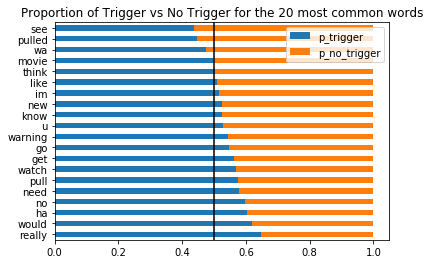

In [41]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_trigger=word_counts.trigger / word_counts['all'],
         p_no_trigger=word_counts.no_trigger / word_counts['all'])
 .sort_values(by='all')
 [['p_trigger', 'p_no_trigger']]
 .tail(20)
 .sort_values('p_no_trigger')
 .plot.barh(stacked=True))

plt.vlines(x=0.5, ymin=-1, ymax=20)
plt.title('Proportion of Trigger vs No Trigger for the 20 most common words')

##### Ratio of frequencies for trigger to no trigger.

In [42]:
(word_counts[(word_counts.trigger > 10) & (word_counts.no_trigger > 10)]
 .assign(ratio= lambda df: df.trigger / df.no_trigger)).sort_values(by='ratio').head(10)

,all,trigger,no_trigger,ratio
avenger,59,18,41,0.439024
v,34,12,22,0.545455
id,35,13,22,0.590909
review,32,12,20,0.600000
whole,29,11,18,0.611111
another,34,13,21,0.619048
fuck,34,13,21,0.619048
head,49,19,30,0.633333
old,33,13,20,0.650000
part,40,16,24,0.666667


##### Word Cloud visualizations.

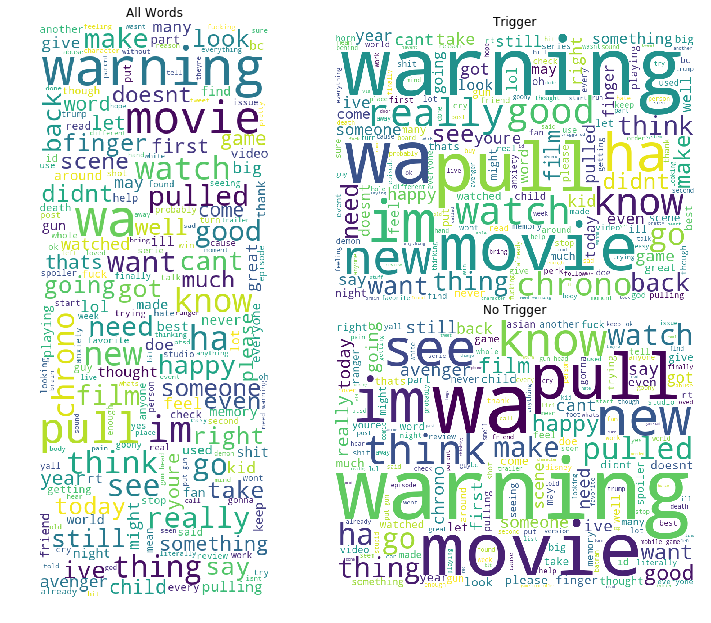

In [43]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_words)
trigger_cloud = WordCloud(background_color='white', height=600, width=800).generate(trigger_scene_words)
no_trigger_cloud = WordCloud(background_color='white', height=600, width=800).generate(no_trigger_scene_words)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(trigger_cloud)
axs[2].imshow(no_trigger_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Trigger')
axs[2].set_title('No Trigger')

for ax in axs: ax.axis('off')

#### Exploring bigrams.

Bigrams for Movies with Trigger Scenes.

In [44]:
trigger_bigrams = nltk.ngrams(trigger_scene_words.split(), 2)
trigger_bigrams

<generator object ngrams at 0x0000010E37357840>

In [45]:
top_20_trigger_scene_bigrams = pd.Series(list(trigger_bigrams)).value_counts().head(20)
top_20_trigger_scene_bigrams.head()

(feel, like)       15
(need, warning)    15
(self, harm)       11
(put, gun)          9
(put, warning)      9
dtype: int64

Visualizing Frequencies with a bar plot and a word cloud.

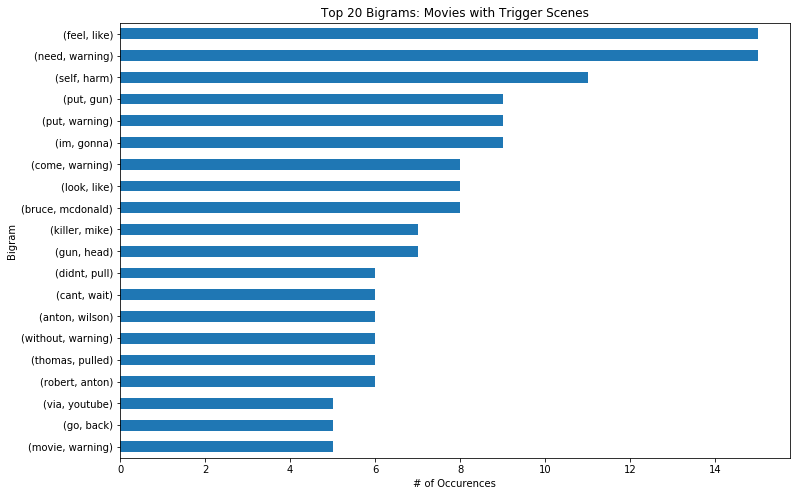

In [46]:
plt.figure(figsize=(12, 8))
top_20_trigger_scene_bigrams.sort_values().plot.barh(stacked=True)

plt.title('Top 20 Bigrams: Movies with Trigger Scenes')
plt.xlabel('# of Occurences')
plt.ylabel('Bigram')
plt.show()

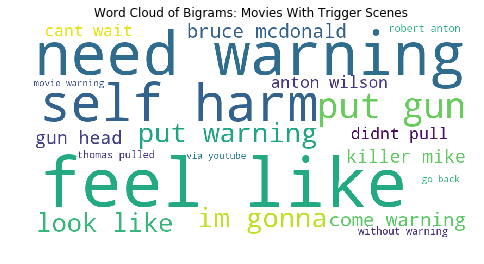

In [47]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_trigger_scene_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.title('Word Cloud of Bigrams: Movies With Trigger Scenes')
plt.imshow(img)
plt.axis('off')
plt.show()

Bigrams for Movies Without Trigger Scenes

In [48]:
no_trigger_bigrams = nltk.ngrams(no_trigger_scene_words.split(), 2)
no_trigger_bigrams

<generator object ngrams at 0x0000010E37990408>

In [49]:
top_20_no_trigger_scene_bigrams = pd.Series(list(no_trigger_bigrams)).value_counts().head(20)
top_20_no_trigger_scene_bigrams.head()

(mobile, game)    18
(gun, head)       17
(smell, like)     16
(look, like)      14
(put, gun)        14
dtype: int64

Visualizing Frequencies with a bar plot and a word cloud.

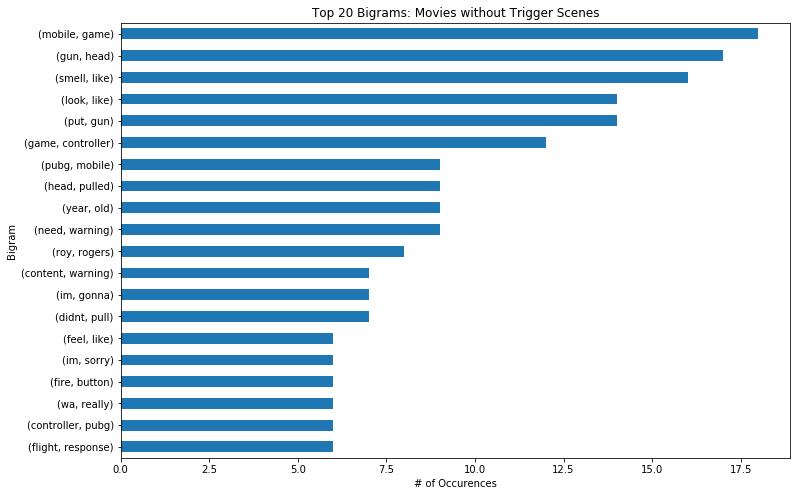

In [50]:
plt.figure(figsize=(12, 8))
top_20_no_trigger_scene_bigrams.sort_values().plot.barh(stacked=True)

plt.title('Top 20 Bigrams: Movies without Trigger Scenes')
plt.xlabel('# of Occurences')
plt.ylabel('Bigram')
plt.show()

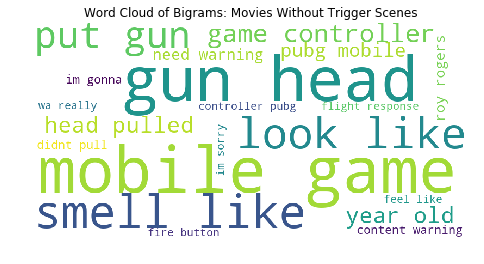

In [51]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_no_trigger_scene_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.title('Word Cloud of Bigrams: Movies Without Trigger Scenes')
plt.axis('off')
plt.show()

### Modeling
First, we need to do some feature engineering.

##### Looking at raw counts, frequencies, and augmented frequencies. Term Frequency.

In [52]:
(pd.DataFrame({'raw_count':trigger_scene_freq})
 .assign(frequency= lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency= lambda df: df.frequency / df.frequency.max()).head(10))

,raw_count,frequency,augmented_frequency
warning,250,0.012330,1.000
wa,178,0.008779,0.712
like,161,0.007940,0.644
pull,152,0.007497,0.608
movie,142,0.007003,0.568
im,117,0.005770,0.468
ha,91,0.004488,0.364
would,88,0.004340,0.352
no,86,0.004241,0.344
get,78,0.003847,0.312


In [53]:
(pd.DataFrame({'raw_count':no_trigger_scene_freq})
 .assign(frequency= lambda df: df.raw_count / df.raw_count.sum())
 .assign(augmented_frequency= lambda df: df.frequency / df.frequency.max()).head(10)).head(10)

,raw_count,frequency,augmented_frequency
warning,210,0.013089,1.000000
wa,198,0.012341,0.942857
like,156,0.009723,0.742857
movie,144,0.008975,0.685714
pull,112,0.006981,0.533333
im,110,0.006856,0.523810
see,68,0.004238,0.323810
u,67,0.004176,0.319048
pulled,66,0.004114,0.314286
know,64,0.003989,0.304762


##### Inverse Document Frequency

In [54]:
# A simple way to calculate idf for demonstration. Note that this
# function relies on the globally defined documents variable.
def idf(word):
    n_occurences = sum([1 for tweet in df.lemmatized_no_stopwords if word in tweet])
    return df.shape[0] / n_occurences

# Get a list of the unique words
unique_words = pd.Series(' '.join(df.lemmatized_no_stopwords).split()).unique()

# put the unique words into a data frame
(pd.DataFrame(dict(word=unique_words))
 # calculate the idf for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False)
 .head(5))

,idf
word,
swimming,2890.0
httpbitlymumnn0,2890.0
cslymon,2890.0
welp,2890.0
gyration,2890.0


##### Using scikit learn to calculate TF-IDF.
Lemmatized without stopwords.

In [55]:
tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(df.lemmatized_no_stopwords)
tfidfs

<2890x10775 sparse matrix of type '<class 'numpy.float64'>'
	with 34349 stored elements in Compressed Sparse Row format>

In [56]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names()).head(10)

,007,00s,010,02,03,0539,06,08,0806,08230,...,zoe,zombie,zone,zooey,zoolander,zootopia,zorx,zowee,zu,zune
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Now we can start modeling
We will be using classification models such as Logistic Regression and Decision Tree.

In [57]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df.lemmatized_no_stopwords)
y = df.trigger_scene

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.3, random_state=123)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

### Logistic Regression

In [58]:
lr = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lr.predict(X_train)
test['predicted'] = lr.predict(X_test)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Train

In [59]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 89.87%
---
Confusion Matrix
actual     False  True 
predicted              
False        689     16
True         189   1129
---
              precision    recall  f1-score   support

       False       0.98      0.78      0.87       878
        True       0.86      0.99      0.92      1145

   micro avg       0.90      0.90      0.90      2023
   macro avg       0.92      0.89      0.89      2023
weighted avg       0.91      0.90      0.90      2023



##### Test

In [60]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 62.86%
---
Confusion Matrix
actual     False  True 
predicted              
False        104     50
True         272    441
---
              precision    recall  f1-score   support

       False       0.68      0.28      0.39       376
        True       0.62      0.90      0.73       491

   micro avg       0.63      0.63      0.63       867
   macro avg       0.65      0.59      0.56       867
weighted avg       0.64      0.63      0.59       867



Performance was good on the train set, decreased substantially on the test set.

### Decision Tree

In [61]:
dt = DecisionTreeClassifier(max_depth=5, random_state=123).fit(X_train, y_train)

train['predicted_decision_tree'] = dt.predict(X_train)
test['predicted_decision_tree'] = dt.predict(X_test)

##### Train

In [62]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_decision_tree)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_decision_tree, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_decision_tree))

Accuracy: 60.11%
---
Confusion Matrix
actual                   False  True 
predicted_decision_tree              
False                       78      7
True                       800   1138
---
              precision    recall  f1-score   support

       False       0.92      0.09      0.16       878
        True       0.59      0.99      0.74      1145

   micro avg       0.60      0.60      0.60      2023
   macro avg       0.75      0.54      0.45      2023
weighted avg       0.73      0.60      0.49      2023



##### Test

In [63]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted_decision_tree)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted_decision_tree, test.actual))
print('---')
print(classification_report(test.actual, test.predicted_decision_tree))

Accuracy: 58.59%
---
Confusion Matrix
actual                   False  True 
predicted_decision_tree              
False                       30     13
True                       346    478
---
              precision    recall  f1-score   support

       False       0.70      0.08      0.14       376
        True       0.58      0.97      0.73       491

   micro avg       0.59      0.59      0.59       867
   macro avg       0.64      0.53      0.44       867
weighted avg       0.63      0.59      0.47       867



Subpar accuracy.

### Random Forest

In [64]:
rf = RandomForestClassifier(random_state=123, max_depth=5)
rf.fit(X_train, y_train)
train['predicted_random_forest'] = rf.predict(X_train)
test['predicted_random_forest'] = rf.predict(X_test)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Train

In [65]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_random_forest)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_random_forest, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_random_forest))

Accuracy: 58.43%
---
Confusion Matrix
actual                   False  True 
predicted_random_forest              
False                       42      5
True                       836   1140
---
              precision    recall  f1-score   support

       False       0.89      0.05      0.09       878
        True       0.58      1.00      0.73      1145

   micro avg       0.58      0.58      0.58      2023
   macro avg       0.74      0.52      0.41      2023
weighted avg       0.71      0.58      0.45      2023



##### Test

In [66]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted_random_forest)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted_random_forest, test.actual))
print('---')
print(classification_report(test.actual, test.predicted_random_forest))

Accuracy: 57.32%
---
Confusion Matrix
actual                   False  True 
predicted_random_forest              
False                       14      8
True                       362    483
---
              precision    recall  f1-score   support

       False       0.64      0.04      0.07       376
        True       0.57      0.98      0.72       491

   micro avg       0.57      0.57      0.57       867
   macro avg       0.60      0.51      0.40       867
weighted avg       0.60      0.57      0.44       867



Subpar accuracy again.

### Support Vector Machine

In [67]:
svmachine = SVC(random_state=123).fit(X_train, y_train)

train['predicted_svm'] = svmachine.predict(X_train)
test['predicted_svm'] = svmachine.predict(X_test)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


##### Train

In [68]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted_svm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted_svm, train.actual))
print('---')
print(classification_report(train.actual, train.predicted_svm))

Accuracy: 56.60%
---
Confusion Matrix
actual         False  True 
predicted_svm              
True             878   1145
---
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       878
        True       0.57      1.00      0.72      1145

   micro avg       0.57      0.57      0.57      2023
   macro avg       0.28      0.50      0.36      2023
weighted avg       0.32      0.57      0.41      2023



C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Test

In [69]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted_svm)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted_svm, test.actual))
print('---')
print(classification_report(test.actual, test.predicted_svm))

Accuracy: 56.63%
---
Confusion Matrix
actual         False  True 
predicted_svm              
True             376    491
---
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       376
        True       0.57      1.00      0.72       491

   micro avg       0.57      0.57      0.57       867
   macro avg       0.28      0.50      0.36       867
weighted avg       0.32      0.57      0.41       867



C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The Support Vector Machine is always predicting True.

## Realization:
In production, this model will not be looking at a single tweet and trying to determine if a movie has a self-harm scene. It will instead be looking at several tweets (if available) and then classify each of those tweets as having a self-harm scene or not. Once it has done that, the predicted classes will be tallied up and the class with the most tallies will be what the final prediction is.

With this in mind, we need to perform modeling in a different manner. The train-test split will need to be redone. Tweets for the same movie will need to go into the same split. This can be done by splitting into two dataframes, one for each class. Then we can pick a number of movies to put into the train and test set and finding the point of where to split the set. Once we have a train and test split, we can create, train, and test models as usual. We will then need to create a function that will tally up the predictions for the tweets and return the final predictions for each movie. Another function will take those predictions and compare them to the actual values of the movies.

### Train-Test Split Again

##### Creating a dataframe that contains the tfidf values as well as the title and class for each respective tweet.

In [70]:
pre_split = pd.concat([pd.DataFrame(X.todense(), columns=tfidf.get_feature_names()), pd.DataFrame(y), df.title], axis=1)
pre_split.head()

,007,00s,010,02,03,0539,06,08,0806,08230,...,zone,zooey,zoolander,zootopia,zorx,zowee,zu,zune,trigger_scene,title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home


##### Splitting into two dataframes based on class.

In [71]:
no_scene_df = pre_split[pre_split.trigger_scene == False]
no_scene_df.head()

,007,00s,010,02,03,0539,06,08,0806,08230,...,zone,zooey,zoolander,zootopia,zorx,zowee,zu,zune,trigger_scene,title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,spiderman_far_from_home


In [72]:
has_scene_df = pre_split[pre_split.trigger_scene == True]
has_scene_df.head()

,007,00s,010,02,03,0539,06,08,0806,08230,...,zone,zooey,zoolander,zootopia,zorx,zowee,zu,zune,trigger_scene,title
1254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,237
1255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,237
1256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,237
1257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,237
1258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,237


##### Determining how many movies of each class will be in the train set.

In [73]:
n_self_harm = len(has_scene_df.title.iloc[:, 1].unique())
n_no_self_harm = len(no_scene_df.title.iloc[:, 1].unique())
percent_in_train = 0.7

print(f'Number of movies with self-harm scenes: {n_self_harm}')
print(f'Number of movies with no self-harm scenes: {n_no_self_harm}')

print('----------------------------------------------------------')

n_self_harm_in_train = round(n_self_harm * percent_in_train)
n_no_self_harm_in_train = round(n_no_self_harm * percent_in_train)

print(f'Number of self-harm movies to put into the train set: {n_self_harm_in_train}')
print(f'Number of no self-harm movies to put into the train set: {n_no_self_harm_in_train}')

Number of movies with self-harm scenes: 130
Number of movies with no self-harm scenes: 82
----------------------------------------------------------
Number of self-harm movies to put into the train set: 91
Number of no self-harm movies to put into the train set: 57


##### Determining the point to split at and creating train and test data sets of each class

In [74]:
last_has_scene_movie_in_train = has_scene_df.title.iloc[:, -1].unique()[:n_self_harm_in_train][-1]
index_of_last_has_scene_movie_in_train = (has_scene_df[has_scene_df.title.iloc[:, -1] == last_has_scene_movie_in_train]
                                          .index[-1])

has_scene_rows_to_include_in_train = has_scene_df.loc[:index_of_last_has_scene_movie_in_train].iloc[:,:-2]
has_scene_rows_to_include_in_test = has_scene_df.loc[index_of_last_has_scene_movie_in_train + 1:].iloc[:,:-2]

In [75]:
last_no_scene_movie_in_train = no_scene_df.title.iloc[:, -1].unique()[:n_no_self_harm_in_train][-1]
index_of_last_no_scene_movie_in_train = (no_scene_df[no_scene_df.title.iloc[:, -1] == last_no_scene_movie_in_train]
                                          .index[-1])

no_scene_rows_to_include_in_train = no_scene_df.loc[:index_of_last_no_scene_movie_in_train].iloc[:,:-2]
no_scene_rows_to_include_in_test = no_scene_df.loc[index_of_last_no_scene_movie_in_train + 1:].iloc[:,:-2]

##### Combining the separate class data sets into the final X_train and X_test data sets.

In [76]:
X_train = pd.concat([no_scene_rows_to_include_in_train, has_scene_rows_to_include_in_train])
X_test = pd.concat([no_scene_rows_to_include_in_test, has_scene_rows_to_include_in_test])

print(f'Number of rows in train: {len(X_train)}')
print(f'Number of rows in test: {len(X_test)}')

Number of rows in train: 2035
Number of rows in test: 855


Checking to see that the number of rows in the train and test sets match up with the original number of rows.

In [77]:
if (len(X_train) + len(X_test)) == df.shape[0]:
    print('Number of rows match up')
else:
    print('Number of rows do not match up')

Number of rows match up


##### Creating separate Series of of the classes for train and test sets.

In [78]:
has_scene_class_rows_to_include_in_train = has_scene_df.loc[:index_of_last_has_scene_movie_in_train].iloc[:,-2]
has_scene_class_rows_to_include_in_test = has_scene_df.loc[index_of_last_has_scene_movie_in_train + 1:].iloc[:,-2]

no_scene_class_rows_to_include_in_train = no_scene_df.loc[:index_of_last_no_scene_movie_in_train].iloc[:,-2]
no_scene_class_rows_to_include_in_test = no_scene_df.loc[index_of_last_no_scene_movie_in_train + 1:].iloc[:,-2]

##### Creating the y_train and y_test variables.

In [79]:
y_train = pd.concat([no_scene_class_rows_to_include_in_train, has_scene_class_rows_to_include_in_train])
y_test = pd.concat([no_scene_class_rows_to_include_in_test, has_scene_class_rows_to_include_in_test])

print(f'Number of rows in train: {len(y_train)}')
print(f'Number of rows in test: {len(y_test)}')

Number of rows in train: 2035
Number of rows in test: 855


In [80]:
if (len(y_train) + len(y_test)) == df.shape[0]:
    print('Number of rows match up')
else:
    print('Number of rows do not match up')

Number of rows match up


##### Making fresh train and test dataframes.

In [81]:
train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

### Return to modeling.
I will save some time by first performing a grid search so that I can know the best performing combination of parameters for each model. Then I can compare the models to each other and move forward with the best performer.

##### Logistic Regression

In [147]:
lr = LogisticRegression(random_state=123)
parameters = {'C':[1, 2, 5, 10, 20, 50, 100],
              'solver':['liblinear', 'saga', 'newton-cg', 'lbfgs'],}

lr_gs = GridSearchCV(estimator=lr, param_grid=parameters)

lr_gs.fit(X_train, y_train)

In [151]:
pd.DataFrame(lr_gs.cv_results_).sort_values(by='rank_test_score').head()

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.715723,0.128862,0.035192,0.002163,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",0.615385,0.582048,0.559607,0.585708,0.022923,1,0.922160,0.927871,0.927871,0.925967,0.002692
1,10.225089,0.115157,0.030126,0.003183,1,saga,"{'C': 1, 'solver': 'saga'}",0.615385,0.582048,0.558205,0.585241,0.023458,2,0.922160,0.927871,0.927171,0.925734,0.002543
2,3.187372,0.388248,0.027305,0.003512,1,newton-cg,"{'C': 1, 'solver': 'newton-cg'}",0.615385,0.582048,0.558205,0.585241,0.023458,2,0.922160,0.927871,0.927171,0.925734,0.002543
3,1.194815,0.111326,0.036052,0.004271,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",0.615385,0.582048,0.558205,0.585241,0.023458,2,0.922160,0.927871,0.927171,0.925734,0.002543
5,10.404035,0.616583,0.035068,0.004120,2,saga,"{'C': 2, 'solver': 'saga'}",0.604196,0.559607,0.548387,0.570761,0.024114,5,0.973352,0.982493,0.974790,0.976878,0.004013


In [171]:
print(lr_gs.best_params_)
print(f'Score: {lr_gs.best_score_}')

{'C': 1, 'solver': 'liblinear'}
Score: 0.5857076132648296


In [184]:
scores = {'model':['logistic_regression'],
          'score':[lr_gs.best_score_]}
scores

{'model': ['logistic_regression'], 'score': [0.5857076132648296]}

##### Decision Tree

In [155]:
dt = DecisionTreeClassifier(random_state=123)
parameters = {'criterion':['gini', 'entropy'],
              'max_depth':[3, 5, 7, 10, 20],
              'min_samples_split':[2, 3, 4, 5, 10, 20],
              'max_leaf_nodes':[5, 10, 20]}

dt_gs = GridSearchCV(estimator=dt, param_grid=parameters)

dt_gs.fit(X_train, y_train)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 10, 20], 'min_samples_split': [2, 3, 4, 5, 10, 20], 'max_leaf_nodes': [5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [156]:
pd.DataFrame(dt_gs.cv_results_).sort_values(by='rank_test_score').head()

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
132,1.482320,0.091926,0.060545,0.002860,entropy,7,10,2,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.584615,0.568022,0.591865,0.581504,0.009976,1,0.613604,0.644258,0.631653,0.629838,0.01258
133,1.574496,0.057019,0.061578,0.016888,entropy,7,10,3,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.584615,0.568022,0.591865,0.581504,0.009976,1,0.613604,0.644258,0.631653,0.629838,0.01258
134,1.289052,0.037146,0.049612,0.004415,entropy,7,10,4,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.584615,0.568022,0.591865,0.581504,0.009976,1,0.613604,0.644258,0.631653,0.629838,0.01258
135,1.265287,0.019603,0.051306,0.005058,entropy,7,10,5,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.584615,0.568022,0.591865,0.581504,0.009976,1,0.613604,0.644258,0.631653,0.629838,0.01258
136,1.249575,0.013773,0.052100,0.000414,entropy,7,10,10,"{'criterion': 'entropy', 'max_depth': 7, 'max_...",0.584615,0.568022,0.591865,0.581504,0.009976,1,0.613604,0.644258,0.631653,0.629838,0.01258


In [169]:
print(dt_gs.best_params_)
print(f'Score: {dt_gs.best_score_}')

{'criterion': 'entropy', 'max_depth': 7, 'max_leaf_nodes': 10, 'min_samples_split': 2}
Score: 0.5815039701074264


In [186]:
scores['model'].append('decision_tree')
scores['score'].append(dt_gs.best_score_)
scores

{'model': ['logistic_regression', 'decision_tree'],
 'score': [0.5857076132648296, 0.5815039701074264]}

##### Random Forest

In [172]:
rf = RandomForestClassifier(random_state=123)
parameters = {'n_estimators':[5, 10, 15, 25, 50],
              'criterion':['gini', 'entropy'],
              'max_depth':[3, 5, 7, 10, 20],
              'min_samples_split':[2, 3, 4, 5, 10, 20],
              'min_samples_leaf':[1, 2, 3, 4, 5]}

rf_gs = GridSearchCV(estimator=rf, param_grid=parameters)
rf_gs.fit(X_train, y_train)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [5, 10, 15, 25, 50], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 7, 10, 20], 'min_samples_split': [2, 3, 4, 5, 10, 20], 'min_samples_leaf': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [173]:
pd.DataFrame(rf_gs.cv_results_).sort_values(by='rank_test_score').head()

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
603,0.638639,0.042494,0.053915,0.003774,gini,20,1,2,25,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",...,0.591865,0.582048,0.590845,0.006798,1,0.694250,0.710784,0.712885,0.705973,0.008334
628,0.614034,0.021347,0.048756,0.006313,gini,20,1,20,25,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",...,0.580645,0.593268,0.588977,0.005888,2,0.680224,0.688375,0.696078,0.688226,0.006473
623,0.632251,0.012906,0.056195,0.003128,gini,20,1,10,25,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",...,0.587658,0.590463,0.588510,0.001383,3,0.683731,0.698179,0.703081,0.694997,0.008214
608,0.665386,0.006981,0.055663,0.001818,gini,20,1,3,25,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",...,0.590463,0.579243,0.588043,0.006423,4,0.687237,0.705882,0.710784,0.701301,0.010144
618,0.606170,0.029781,0.051255,0.005203,gini,20,1,5,25,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",...,0.587658,0.583450,0.588043,0.003912,4,0.688640,0.704482,0.707283,0.700135,0.008208


In [174]:
print(rf_gs.best_params_)
print(f'Score: {rf_gs.best_score_}')

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Score: 0.5908453993460999


In [187]:
scores['model'].append('random_forest')
scores['score'].append(rf_gs.best_score_)
scores

{'model': ['logistic_regression', 'decision_tree', 'random_forest'],
 'score': [0.5857076132648296, 0.5815039701074264, 0.5908453993460999]}

##### Support Vector Machine

In [181]:
svmachine = SVC(random_state=123)
parameters = {'C':[1, 10, 10**2, 10**5, 10**7],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
              'degree':[3, 5, 10, 20]}
svmachine_gs = GridSearchCV(estimator=svmachine, param_grid=parameters, verbose=10, n_jobs=4)
svmachine_gs.fit(X_train, y_train)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  2.1min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  3.8min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:  5.6min
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  8.7min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 12.4min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 14.4min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed: 19.1min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed: 23.2min
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed: 27.3min
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed: 32.7min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed: 38.8min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed: 44.6min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed: 50.6min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 57.8min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed: 65.1min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 71.3min
[Parallel(n_jobs=5)]: Do

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=123,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'C': [1, 10, 100, 100000, 10000000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [3, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [182]:
pd.DataFrame(svmachine_gs.cv_results_).sort_values(by='rank_test_score').head()

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,54.237937,0.301194,20.541393,0.281292,1,3,linear,"{'C': 1, 'degree': 3, 'kernel': 'linear'}",0.598601,0.542777,0.551192,0.564222,0.024585,1,0.966339,0.971989,0.971289,0.969872,0.002514
4,42.386141,0.370246,20.862759,0.180421,1,5,linear,"{'C': 1, 'degree': 5, 'kernel': 'linear'}",0.598601,0.542777,0.551192,0.564222,0.024585,1,0.966339,0.971989,0.971289,0.969872,0.002514
8,47.782412,0.699383,23.473658,0.125271,1,10,linear,"{'C': 1, 'degree': 10, 'kernel': 'linear'}",0.598601,0.542777,0.551192,0.564222,0.024585,1,0.966339,0.971989,0.971289,0.969872,0.002514
12,43.867603,0.761529,20.709940,0.122372,1,20,linear,"{'C': 1, 'degree': 20, 'kernel': 'linear'}",0.598601,0.542777,0.551192,0.564222,0.024585,1,0.966339,0.971989,0.971289,0.969872,0.002514
30,50.064098,0.112867,23.305157,0.193566,10,20,rbf,"{'C': 10, 'degree': 20, 'kernel': 'rbf'}",0.560839,0.561010,0.561010,0.560953,0.000080,5,0.561010,0.560924,0.560924,0.560953,0.000040


In [183]:
print(svmachine_gs.best_params_)
print(f'Score: {svmachine_gs.best_score_}')

{'C': 1, 'degree': 3, 'kernel': 'linear'}
Score: 0.5642223260158804


In [188]:
scores['model'].append('svm')
scores['score'].append(svmachine_gs.best_score_)
scores

{'model': ['logistic_regression', 'decision_tree', 'random_forest', 'svm'],
 'score': [0.5857076132648296,
  0.5815039701074264,
  0.5908453993460999,
  0.5642223260158804]}

In [191]:
pd.DataFrame(scores).sort_values(by='score', ascending=False)

,model,score
2,random_forest,0.590845
0,logistic_regression,0.585708
1,decision_tree,0.581504
3,svm,0.564222


##### Random Forest was the best performing, with a mean score of  0.59
Worst performing was Support Vector Machine. At this point I can do two things:
1. I can create the voting function and apply it to the predictions that the Random Forest made, then compare the final prediction to the actual class.
1. I can look at other classification algorithms and create more models.

I think I will briefly look at other algorithms, create a few more models, then move on.

##### KNN

In [195]:
knn = KNeighborsClassifier()
parameters = {'n_neighbors':[3, 5, 9, 15],
              'weights':['uniform', 'distance'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'p':[1, 2],
              'metric':['minkowski', 'euclidean', 'manhattan']}

knn_gs = GridSearchCV(estimator=knn, param_grid=parameters, n_jobs=4, verbose=10)
knn_gs.fit(X_train, y_train)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:  2.8min
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:  4.4min
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  7.1min
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:  9.7min
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 11.1min
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed: 14.9min
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed: 17.4min
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed: 19.9min
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed: 23.9min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed: 28.2min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed: 31.9min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed: 35.8min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed: 41.7min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed: 48.5min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed: 54.0min
[Parallel(n_jobs=5)]: Do

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'n_neighbors': [3, 5, 9, 15], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'p': [1, 2], 'metric': ['minkowski', 'euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [196]:
pd.DataFrame(knn_gs.cv_results_).sort_values(by='rank_test_score').head()

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_metric,param_n_neighbors,param_p,param_weights,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
143,0.628821,0.030825,26.021804,0.225838,brute,manhattan,15,2,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",...,0.575035,0.528752,0.521719,0.046611,1,0.98878,0.997199,0.998599,0.994859,0.004337
141,0.384970,0.038221,27.338083,3.109852,brute,manhattan,15,1,distance,"{'algorithm': 'brute', 'metric': 'manhattan', ...",...,0.575035,0.528752,0.521719,0.046611,1,0.98878,0.997199,0.998599,0.994859,0.004337
109,0.333622,0.011997,25.163212,1.435920,brute,minkowski,15,1,distance,"{'algorithm': 'brute', 'metric': 'minkowski', ...",...,0.575035,0.528752,0.521719,0.046611,1,0.98878,0.997199,0.998599,0.994859,0.004337
61,1.774455,0.188506,31.418913,1.761943,kd_tree,minkowski,15,1,distance,"{'algorithm': 'kd_tree', 'metric': 'minkowski'...",...,0.523142,0.507714,0.510509,0.009375,4,0.98878,0.997199,0.998599,0.994859,0.004337
95,1.589338,0.059019,29.409487,0.130297,kd_tree,manhattan,15,2,distance,"{'algorithm': 'kd_tree', 'metric': 'manhattan'...",...,0.523142,0.507714,0.510509,0.009375,4,0.98878,0.997199,0.998599,0.994859,0.004337


In [197]:
print(knn_gs.best_params_)
print(f'Score: {knn_gs.best_score_}')

{'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Score: 0.5217188229799159


In [198]:
scores['model'].append('knn')
scores['score'].append(knn_gs.best_score_)
scores

{'model': ['logistic_regression',
  'decision_tree',
  'random_forest',
  'svm',
  'knn'],
 'score': [0.5857076132648296,
  0.5815039701074264,
  0.5908453993460999,
  0.5642223260158804,
  0.5217188229799159]}

##### XGBoost

In [83]:
from xgboost.sklearn import XGBClassifier

In [205]:
xgbc = XGBClassifier(random_state=123, verbosity=2)
parameters = {'max_depth':[3, 5, 7, 9],
              'n_estimators':[3, 5, 10, 20],
              'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
              'booster':['gbtree', 'gblinear']}

xgbc_gs = GridSearchCV(estimator=xgbc, param_grid=parameters, n_jobs=4, verbose=10)
xgbc_gs.fit(X_train, y_train)

C:\Users\mz211\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 224 candidates, totalling 672 fits


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   20.2s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   34.7s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   50.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.6min
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  5.1min
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  6.3min
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 12.4min
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 16.0min
[Parallel(n_jobs=4)]: Do

[18:12:34] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[18:12:35] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[18:12:36] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=5
[18:12:37] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=5
[18:12:38] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=5
[18:12:39] INFO: C:\Jenkins\workspace\xgboost-win64_release_0.90\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=5
[18:

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=123, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=2),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [3, 5, 7, 9], 'n_estimators': [3, 5, 10, 20], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5], 'booster': ['gbtree', 'gblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [207]:
pd.DataFrame(xgbc_gs.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
55,36.529869,1.411375,0.850986,0.013169,gbtree,0.1,5,20,"{'booster': 'gbtree', 'learning_rate': 0.1, 'm...",0.601399,0.583450,0.589060,0.591312,0.007500,1,0.657784,0.682073,0.694678,0.678178,0.015312
71,30.240894,0.287294,0.754856,0.047895,gbtree,0.2,5,20,"{'booster': 'gbtree', 'learning_rate': 0.2, 'm...",0.595804,0.590463,0.587658,0.591312,0.003380,1,0.696353,0.728291,0.726891,0.717179,0.014737
108,9.553346,0.490542,0.866615,0.048710,gbtree,0.5,9,3,"{'booster': 'gbtree', 'learning_rate': 0.5, 'm...",0.597203,0.584853,0.590463,0.590845,0.005050,3,0.697756,0.726891,0.722689,0.715779,0.012859
59,43.549828,0.575555,0.838492,0.085179,gbtree,0.1,7,20,"{'booster': 'gbtree', 'learning_rate': 0.1, 'm...",0.601399,0.582048,0.587658,0.590378,0.008132,4,0.670407,0.719888,0.710084,0.700126,0.021393
105,13.545625,0.223739,0.856912,0.030280,gbtree,0.5,7,5,"{'booster': 'gbtree', 'learning_rate': 0.5, 'm...",0.612587,0.575035,0.582048,0.589911,0.016310,5,0.713184,0.725490,0.721289,0.719987,0.005108


In [209]:
print(xgbc_gs.best_params_)
print(f'Score: {xgbc_gs.best_score_}')

{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 20}
Score: 0.5913124708080336


In [212]:
scores['model'].append('XGBoost')
scores['score'].append(xgbc_gs.best_score_)
pd.DataFrame(scores).sort_values(by='score', ascending=False)

,model,score
5,XGBoost,0.591312
6,XGBoost,0.591312
7,XGBoost,0.591312
2,random_forest,0.590845
0,logistic_regression,0.585708
1,decision_tree,0.581504
3,svm,0.564222
4,knn,0.521719


##### XGBoost is now the best performer with an average score of 0.591
I will go with the XGBoost model going forward.

In [84]:
final_xgbc = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=5, n_estimators=20, random_state=123)
final_xgbc.fit(X_train, y_train)
train['predicted_xgbc'] = final_xgbc.predict(X_train)

In [85]:
print(f'Accuracy: {final_xgbc.score(X_train, y_train)}')
print('----------------------------------------------------------------------')
print(pd.crosstab(train.actual, train.predicted_xgbc))
print('----------------------------------------------------------------------')
print(classification_report(train.actual, train.predicted_xgbc))

Accuracy: 0.6619164619164619
----------------------------------------------------------------------
predicted_xgbc  False  True 
actual                      
False             234    666
True               22   1113
----------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.91      0.26      0.40       900
        True       0.63      0.98      0.76      1135

   micro avg       0.66      0.66      0.66      2035
   macro avg       0.77      0.62      0.58      2035
weighted avg       0.75      0.66      0.61      2035



In [86]:
final_rf = RandomForestClassifier(random_state=123, criterion='gini', max_depth=20, min_samples_leaf=1,
                                  min_samples_split=2, n_estimators=25)
final_rf.fit(X_train, y_train)
train['predicted_rf'] = final_rf.predict(X_train)

In [87]:
print(f'Accuracy: {final_rf.score(X_train, y_train)}')
print('----------------------------------------------------------------------')
print(pd.crosstab(train.actual, train.predicted_rf))
print('----------------------------------------------------------------------')
print(classification_report(train.actual, train.predicted_rf))

Accuracy: 0.7027027027027027
----------------------------------------------------------------------
predicted_rf  False  True 
actual                    
False           298    602
True              3   1132
----------------------------------------------------------------------
              precision    recall  f1-score   support

       False       0.99      0.33      0.50       900
        True       0.65      1.00      0.79      1135

   micro avg       0.70      0.70      0.70      2035
   macro avg       0.82      0.66      0.64      2035
weighted avg       0.80      0.70      0.66      2035



##### When using the model on the whole train set, the accuracy is 0.65.
However, it is classifying most tweets as indicating a movie has a trigger scene. A lot of false positives are occuring, meaning majority of the tweets are classifed as True.

In [94]:
train_titles_has_scene = has_scene_df.loc[:index_of_last_has_scene_movie_in_train].iloc[:,-1]
train_titles_has_scene.head()

1254    237
1255    237
1256    237
1257    237
1258    237
Name: title, dtype: object

In [95]:
train_titles_no_scene = no_scene_df.loc[:index_of_last_no_scene_movie_in_train].iloc[:,-1]
train_titles_no_scene.head()

0    spiderman_far_from_home
1    spiderman_far_from_home
2    spiderman_far_from_home
3    spiderman_far_from_home
4    spiderman_far_from_home
Name: title, dtype: object

In [96]:
train_titles = pd.concat([train_titles_no_scene, train_titles_has_scene])

In [97]:
train['title'] = train_titles

In [98]:
train.head(15)

,actual,predicted_xgbc,predicted_rf,title
0,False,False,False,spiderman_far_from_home
1,False,True,True,spiderman_far_from_home
2,False,False,False,spiderman_far_from_home
3,False,True,True,spiderman_far_from_home
4,False,True,True,spiderman_far_from_home
5,False,True,True,spiderman_far_from_home
6,False,True,True,spiderman_far_from_home
7,False,True,False,midsommar
8,False,True,True,midsommar
9,False,False,False,midsommar


In [99]:
train.groupby(['title', 'predicted_xgbc']).title.count()

title                                  predicted_xgbc
1408                                   True              17
237                                    True              20
28_days_later                          True               1
3_idiots                               True               4
47_ronin                               True               2
a_clockwork_orange                     True              20
a_long_way_down                        True               4
a_mothers_nightmare                    True               1
a_single_man                           True               5
a_star_is_born                         False              6
                                       True              14
after                                  False              3
                                       True              18
airplane                               False              1
                                       True              19
aladdin                                False  

##### Predicting True most of the time is not good. 
In production, this will almost guarantee that survivors of self-harm will never see a movie with a scene like that, but they also won't see many movies that don't have those scenes. According to the model, Lion King should be avoided.

I can try to adjust the decision threshold so that the probability will need to be higher in order to be classified as True.

First, I can look to see if there is a different in the predicted probabilities for the two classes.

In [100]:
train['predicted_proba_xgbc'] = final_xgbc.predict_proba(X_train)[:,1]

In [101]:
train.groupby('actual').predicted_proba_xgbc.median()

actual
False    0.559705
True     0.575174
Name: predicted_proba_xgbc, dtype: float32

##### It seems that the probabilities might be similar between the two classes.
This might mean that increasing the decision threshold still won't improve the model much.

Creating a function to classify based on new threshold.

In [102]:
def classify_with_new_decision_threshold(probability, new_threshold):
    if probability > new_threshold:
        return True
    else:
        return False

In [115]:
train.head(20)

,actual,predicted_xgbc,predicted_rf,title,predicted_proba_xgbc,predicted_xgbc_at_0_50.0,predicted_xgbc_at_0_51.0,predicted_xgbc_at_0_52.0,predicted_xgbc_at_0_53.0,predicted_xgbc_at_0_54.0,...,predicted_xgbc_at_0_61.0,predicted_xgbc_at_0_62.0,predicted_xgbc_at_0_63.0,predicted_xgbc_at_0_64.0,predicted_xgbc_at_0_65.0,predicted_xgbc_at_0_66.0,predicted_xgbc_at_0_67.0,predicted_xgbc_at_0_68.0,predicted_xgbc_at_0_69.0,predicted_xgbc_at_0_70.0
0,False,False,False,spiderman_far_from_home,0.495947,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,spiderman_far_from_home,0.589120,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,spiderman_far_from_home,0.482563,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,spiderman_far_from_home,0.559705,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,spiderman_far_from_home,0.604833,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,False,True,True,spiderman_far_from_home,0.506390,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,True,True,spiderman_far_from_home,0.535549,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,midsommar,0.570561,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
8,False,True,True,midsommar,0.559705,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,midsommar,0.338167,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Creating a loop to run through thresholds and store the predictions in the train dataframe.

In [104]:
i = 0.5
while i <= 0.7:
    # print(i)
    i = round(i, 2)
    # print(i)
    train[f'predicted_xgbc_at_0_{i*100}'] = [classify_with_new_decision_threshold(x, i) for x in train.predicted_proba_xgbc]
    # print(i*100)
    i+=0.01
    

0.5
50.0
0.51
51.0
0.52
52.0
0.53
53.0
0.54
54.0
0.55
55.00000000000001
0.56
56.00000000000001
0.57
56.99999999999999
0.58
57.99999999999999
0.59
59.0
0.6
60.0
0.61
61.0
0.62
62.0
0.63
63.0
0.64
64.0
0.65
65.0
0.66
66.0
0.67
67.0
0.68
68.0
0.69
69.0
0.7
70.0


##### Storing the thresholds in a list.

In [105]:
i = 0.5
thresholds = []
while i <= 0.7:
    i = round(i, 2)
    thresholds.append(i)
    i+=0.01
thresholds

[0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7]

In [106]:
train.head()

,actual,predicted_xgbc,predicted_rf,title,predicted_proba_xgbc,predicted_xgbc_at_0_50.0,predicted_xgbc_at_0_51.0,predicted_xgbc_at_0_52.0,predicted_xgbc_at_0_53.0,predicted_xgbc_at_0_54.0,...,predicted_xgbc_at_0_61.0,predicted_xgbc_at_0_62.0,predicted_xgbc_at_0_63.0,predicted_xgbc_at_0_64.0,predicted_xgbc_at_0_65.0,predicted_xgbc_at_0_66.0,predicted_xgbc_at_0_67.0,predicted_xgbc_at_0_68.0,predicted_xgbc_at_0_69.0,predicted_xgbc_at_0_70.0
0,False,False,False,spiderman_far_from_home,0.495947,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,spiderman_far_from_home,0.589120,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,spiderman_far_from_home,0.482563,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,spiderman_far_from_home,0.559705,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,spiderman_far_from_home,0.604833,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


##### Storing the threshold scores in a list.

In [107]:
thresholds_scores = []
for column in train.iloc[:,5:].columns:
    thresholds_scores.append(accuracy_score(train.actual, train[column]))
thresholds_scores

[0.6619164619164619,
 0.6702702702702703,
 0.6737100737100737,
 0.6825552825552825,
 0.686977886977887,
 0.6968058968058968,
 0.6987714987714988,
 0.6909090909090909,
 0.5361179361179361,
 0.5326781326781327,
 0.5267813267813268,
 0.514987714987715,
 0.5031941031941032,
 0.5012285012285013,
 0.4796068796068796,
 0.4722358722358722,
 0.47125307125307125,
 0.4702702702702703,
 0.4683046683046683,
 0.4683046683046683,
 0.4614250614250614]

In [108]:
train.iloc[:,5:].columns

Index(['predicted_xgbc_at_0_50.0', 'predicted_xgbc_at_0_51.0',
       'predicted_xgbc_at_0_52.0', 'predicted_xgbc_at_0_53.0',
       'predicted_xgbc_at_0_54.0', 'predicted_xgbc_at_0_55.00000000000001',
       'predicted_xgbc_at_0_56.00000000000001',
       'predicted_xgbc_at_0_56.99999999999999',
       'predicted_xgbc_at_0_57.99999999999999', 'predicted_xgbc_at_0_59.0',
       'predicted_xgbc_at_0_60.0', 'predicted_xgbc_at_0_61.0',
       'predicted_xgbc_at_0_62.0', 'predicted_xgbc_at_0_63.0',
       'predicted_xgbc_at_0_64.0', 'predicted_xgbc_at_0_65.0',
       'predicted_xgbc_at_0_66.0', 'predicted_xgbc_at_0_67.0',
       'predicted_xgbc_at_0_68.0', 'predicted_xgbc_at_0_69.0',
       'predicted_xgbc_at_0_70.0'],
      dtype='object')

In [109]:
print(len(thresholds))
print(len(thresholds_scores))

21
21


In [110]:
thresholds_dataframe = pd.DataFrame({'thresholds':thresholds, 'score':thresholds_scores})
thresholds_dataframe.head()

,probabilities,score
0,0.50,0.661916
1,0.51,0.670270
2,0.52,0.673710
3,0.53,0.682555
4,0.54,0.686978


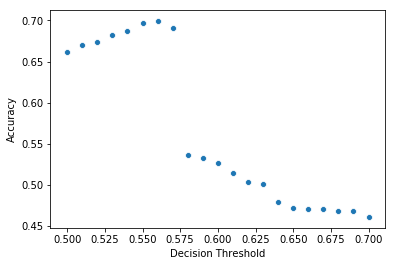

In [111]:
sns.scatterplot(x=thresholds_dataframe.thresholds, y=thresholds_dataframe.score)
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.show()

In [112]:
thresholds_dataframe.sort_values(by='score', ascending=False).head()

,probabilities,score
6,0.56,0.698771
5,0.55,0.696806
7,0.57,0.690909
4,0.54,0.686978
3,0.53,0.682555


In [114]:
print(f'Accuracy: {accuracy_score(train.actual, train["predicted_xgbc_at_0_56.00000000000001"])}')
print('--------------------------------------------------------')
print(pd.crosstab(train.actual, train["predicted_xgbc_at_0_56.00000000000001"]))

Accuracy: 0.6987714987714988
--------------------------------------------------------
predicted_xgbc_at_0_56.00000000000001  False  True 
actual                                             
False                                    471    429
True                                     184    951


### Testing new decision thresholds with random forest model.

In [117]:
train['predicted_proba_rf'] = final_rf.predict_proba(X_train)[:,1]

In [118]:
i = 0.5
while i <= 0.7:
    # print(i)
    i = round(i, 2)
    # print(i)
    train[f'predicted_rf_at_0_{i*100}'] = [classify_with_new_decision_threshold(x, i) for x in train.predicted_proba_rf]
    # print(i*100)
    i+=0.01
    

In [119]:
i = 0.5
thresholds_rf = []
while i <= 0.7:
    i = round(i, 2)
    thresholds_rf.append(i)
    i+=0.01
thresholds_rf

[0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7]

In [124]:
thresholds_scores_rf = []
for column in train.iloc[:,27:].columns:
    thresholds_scores_rf.append(accuracy_score(train.actual, train[column]))
thresholds_scores_rf

[0.7027027027027027,
 0.7174447174447175,
 0.7380835380835381,
 0.7651105651105651,
 0.7828009828009828,
 0.8181818181818182,
 0.826044226044226,
 0.830958230958231,
 0.8339066339066339,
 0.8054054054054054,
 0.6977886977886978,
 0.6466830466830467,
 0.5877149877149878,
 0.538083538083538,
 0.5194103194103195,
 0.49484029484029485,
 0.483046683046683,
 0.4683046683046683,
 0.4624078624078624,
 0.4574938574938575,
 0.4491400491400491]

In [125]:
print(len(thresholds_rf))
print(len(thresholds_scores_rf))

21
21


In [127]:
thresholds_dataframe_rf = pd.DataFrame({'thresholds':thresholds_rf, 'score':thresholds_scores_rf})
thresholds_dataframe_rf.head()

,thresholds,score
0,0.50,0.702703
1,0.51,0.717445
2,0.52,0.738084
3,0.53,0.765111
4,0.54,0.782801


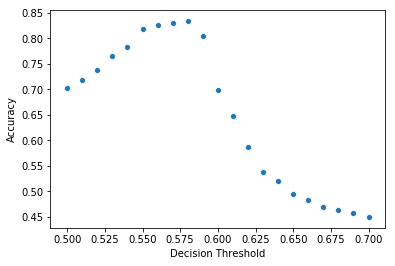

In [128]:
sns.scatterplot(x=thresholds_dataframe_rf.thresholds, y=thresholds_dataframe_rf.score)
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy')
plt.show()

In [129]:
thresholds_dataframe_rf.sort_values(by='score', ascending=False).head()

,thresholds,score
8,0.58,0.833907
7,0.57,0.830958
6,0.56,0.826044
5,0.55,0.818182
9,0.59,0.805405


In [132]:
train.columns

Index(['actual', 'predicted_xgbc', 'predicted_rf', 'title',
       'predicted_proba_xgbc', 'predicted_xgbc_at_0_50.0',
       'predicted_xgbc_at_0_51.0', 'predicted_xgbc_at_0_52.0',
       'predicted_xgbc_at_0_53.0', 'predicted_xgbc_at_0_54.0',
       'predicted_xgbc_at_0_55.00000000000001',
       'predicted_xgbc_at_0_56.00000000000001',
       'predicted_xgbc_at_0_56.99999999999999',
       'predicted_xgbc_at_0_57.99999999999999', 'predicted_xgbc_at_0_59.0',
       'predicted_xgbc_at_0_60.0', 'predicted_xgbc_at_0_61.0',
       'predicted_xgbc_at_0_62.0', 'predicted_xgbc_at_0_63.0',
       'predicted_xgbc_at_0_64.0', 'predicted_xgbc_at_0_65.0',
       'predicted_xgbc_at_0_66.0', 'predicted_xgbc_at_0_67.0',
       'predicted_xgbc_at_0_68.0', 'predicted_xgbc_at_0_69.0',
       'predicted_xgbc_at_0_70.0', 'predicted_proba_rf',
       'predicted_rf_at_0_50.0', 'predicted_rf_at_0_51.0',
       'predicted_rf_at_0_52.0', 'predicted_rf_at_0_53.0',
       'predicted_rf_at_0_54.0', 'predicted_r

In [134]:
print(f'Accuracy: {accuracy_score(train.actual, train["predicted_rf_at_0_57.99999999999999"])}')
print('--------------------------------------------------------')
print(pd.crosstab(train.actual, train["predicted_rf_at_0_57.99999999999999"]))

Accuracy: 0.8339066339066339
--------------------------------------------------------
predicted_rf_at_0_57.99999999999999  False  True 
actual                                           
False                                  719    181
True                                   157    978


### Random Forest performs much better than XGBoost.
0.83 for Random Forest versus 0.69 for XGBoost. This is with the decision threshold set at 0.58. False positives have decreased. I will use Random Forest going forward.

I now need to create the function that will tally up the votes and use it on the predicted classes from the adjusted rf model.

In [138]:
results_rf = train[['title', 'predicted_rf_at_0_57.99999999999999']]

In [139]:
results_rf.head(15)

,title,predicted_rf_at_0_57.99999999999999
0,spiderman_far_from_home,False
1,spiderman_far_from_home,False
2,spiderman_far_from_home,False
3,spiderman_far_from_home,False
4,spiderman_far_from_home,False
5,spiderman_far_from_home,False
6,spiderman_far_from_home,False
7,midsommar,False
8,midsommar,False
9,midsommar,False


In [169]:
counts_rf = results_rf.groupby(['title', 'predicted_rf_at_0_57.99999999999999']).title.count().unstack().fillna(0)
counts_rf.head()

predicted_rf_at_0_57.99999999999999,False,True
title,,
1408,2.0,15.0
237,3.0,17.0
28_days_later,0.0,1.0
3_idiots,1.0,3.0
47_ronin,1.0,1.0


In [170]:
counts_rf['final_prediction'] = counts_rf.idxmax(axis=1)
counts_rf.head()

predicted_rf_at_0_57.99999999999999,False,True,final_prediction
title,,,
1408,2.0,15.0,True
237,3.0,17.0,True
28_days_later,0.0,1.0,True
3_idiots,1.0,3.0,True
47_ronin,1.0,1.0,False


So I didn't make a function but still got the end result I wanted.

In [212]:
train.groupby('title').actual.max().head()

title
1408             True
237              True
28_days_later    True
3_idiots         True
47_ronin         True
Name: actual, dtype: bool

In [181]:
final_pred_and_actual = pd.concat([counts_rf.final_prediction, train.groupby('title').actual.max()], axis=1)
final_pred_and_actual.head()

,final_prediction,actual
title,,
1408,True,True
237,True,True
28_days_later,True,True
3_idiots,True,True
47_ronin,False,True


In [194]:
print(f'''Final accuracy on train set with random forest model: 
{accuracy_score(final_pred_and_actual.actual, final_pred_and_actual.final_prediction)*100:.2f}%''')

Final accuracy on train set with random forest model: 
94.56%


### 94% accuracy, not too shabby.
Now I will need to evaluate the model's performance on the test set.

### Evaluating performance on the test set.

##### Getting probabilities so that we can make classifications based on 0.58 decision threshold.

In [196]:
test['predicted_proba_rf'] = final_rf.predict_proba(X_test)[:,1]

In [198]:
test['predicted_rf_at_0_58'] = [classify_with_new_decision_threshold(x, 0.58) for x in test.predicted_proba_rf]
test.head()

,actual,predicted_proba_rf,predicted_rf_at_0_58
900,False,0.565262,False
901,False,0.614397,True
902,False,0.602103,True
903,False,0.636615,True
904,False,0.599885,True


##### Adding titles so we can groupby them.

In [203]:
test_titles_has_scene = has_scene_df.loc[index_of_last_has_scene_movie_in_train + 1:].iloc[:,-1]

test_titles_no_scene = no_scene_df.loc[index_of_last_no_scene_movie_in_train + 1:].iloc[:,-1]

In [204]:
test_titles = pd.concat([test_titles_no_scene, test_titles_has_scene])

In [205]:
test['titles'] = test_titles

In [207]:
test.head(15)

,actual,predicted_proba_rf,predicted_rf_at_0_58,titles
900,False,0.565262,False,the_neverending_story
901,False,0.614397,True,the_neverending_story
902,False,0.602103,True,the_neverending_story
903,False,0.636615,True,the_neverending_story
904,False,0.599885,True,the_neverending_story
905,False,0.604203,True,the_neverending_story
906,False,0.554448,False,the_neverending_story
907,False,0.594759,True,the_neverending_story
908,False,0.582147,True,the_neverending_story
909,False,0.530600,False,the_neverending_story


In [208]:
print(f'Accuracy: {accuracy_score(test.actual, test["predicted_rf_at_0_58"])}')
print('--------------------------------------------------------')
print(pd.crosstab(test.actual, test["predicted_rf_at_0_58"]))

Accuracy: 0.5251461988304094
--------------------------------------------------------
predicted_rf_at_0_58  False  True 
actual                            
False                   157    197
True                    209    292


##### Initial accuracy of individual tweets is bad a 0.52
Moving forward with making final predictions from tallying up.

In [210]:
results_rf_test = test[['titles', 'predicted_rf_at_0_58']]

In [211]:
counts_rf_test = (results_rf_test.groupby(['titles', 'predicted_rf_at_0_58'])
                  .titles.count().unstack().fillna(0))
counts_rf_test.head()

predicted_rf_at_0_58,False,True
titles,,
always_be_my_maybe,2.0,2.0
bad_times_at_the_el_royale,1.0,1.0
booksmart,0.0,6.0
crazy_rich_asians,7.0,10.0
fast__furious_9,2.0,0.0


In [213]:
counts_rf_test['final_prediction'] = counts_rf_test.idxmax(axis=1)
counts_rf_test.head()

predicted_rf_at_0_58,False,True,final_prediction
titles,,,
always_be_my_maybe,2.0,2.0,False
bad_times_at_the_el_royale,1.0,1.0,False
booksmart,0.0,6.0,True
crazy_rich_asians,7.0,10.0,True
fast__furious_9,2.0,0.0,False


In [214]:
final_pred_and_actual_test = pd.concat([counts_rf_test.final_prediction, test.groupby('titles').actual.max()], axis=1)
final_pred_and_actual_test.head()

,final_prediction,actual
titles,,
always_be_my_maybe,False,False
bad_times_at_the_el_royale,False,False
booksmart,True,False
crazy_rich_asians,True,False
fast__furious_9,False,False


In [216]:
print(f'''Final accuracy on test set with random forest model: 
{accuracy_score(final_pred_and_actual_test.actual, final_pred_and_actual_test.final_prediction)*100:.2f}%''')

Final accuracy on test set with random forest model: 
59.68%


### 59% accuracy.
Huge drop in accuracy. Can be due to overfitting the decision threshold to the train set. I need to go back and decide on a decision threshold with cross validation. Adjustments/changes to consider:
1. Cross validate decision threshold.
1. Use bigrams.
1. Use bag of words instead of tf-idf.
1. Include sentiment analysis.

### Manual cross validation of decision threshold.
I will use the train test split function to split  the training set into a train and validation set. After that I will go through the different thresholds again and make predictions for the train and validation sets. I will take the average accuracy of the two and move forward with the threshold that has the highest average accuracy.

##### Splitting train set into train and validation sets.

In [221]:
small_X_train, small_X_validation, small_y_train, small_y_validation = train_test_split(X_train, y_train,
                 random_state=123,
                 stratify=y_train)

In [239]:
cv_train_rf = pd.DataFrame({'actual':small_y_train})
cv_train_xgbc = pd.DataFrame({'actual':small_y_train})

In [240]:
cv_train_rf['predicted_probabilities'] = final_rf.predict_proba(small_X_train)[:,1]
cv_train_xgbc['predicted_probabilities'] = final_xgbc.predict_proba(small_X_train)[:,1]

In [241]:
cv_train_rf.head()

,actual,predicted_probabilities
2273,True,0.594759
2369,True,0.659436
1368,True,0.594759
825,False,0.594759
785,False,0.549837


In [242]:
cv_validation_rf = pd.DataFrame({'actual':small_y_validation})
cv_validation_xgbc = pd.DataFrame({'actual':small_y_validation})

cv_validation_rf['predicted_probabilities'] = final_rf.predict_proba(small_X_validation)[:,1]
cv_validation_xgbc['predicted_probabilities'] = final_xgbc.predict_proba(small_X_validation)[:,1]

In [243]:
cv_validation_rf.head()

,actual,predicted_probabilities
2315,True,0.611055
480,False,0.571186
645,False,0.532879
1946,True,0.572710
1528,True,0.594759


In [244]:
for dataframe in [cv_train_rf, cv_train_xgbc, cv_validation_rf, cv_validation_xgbc]:
    i = 0.5
    while i <= 0.65:
        # print(i)
        i = round(i, 2)
        # print(i)
        dataframe[f'predicted_class_at_0_{int(i*100)}'] = [classify_with_new_decision_threshold(x, i) for x in dataframe.predicted_probabilities]
        # print(i*100)
        i+=0.01
    print(dataframe.columns)
    

Index(['actual', 'predicted_probabilities', 'predicted_class_at_0_50',
       'predicted_class_at_0_51', 'predicted_class_at_0_52',
       'predicted_class_at_0_53', 'predicted_class_at_0_54',
       'predicted_class_at_0_55', 'predicted_class_at_0_56',
       'predicted_class_at_0_57', 'predicted_class_at_0_59',
       'predicted_class_at_0_60', 'predicted_class_at_0_61',
       'predicted_class_at_0_62', 'predicted_class_at_0_63',
       'predicted_class_at_0_64', 'predicted_class_at_0_65'],
      dtype='object')
Index(['actual', 'predicted_probabilities', 'predicted_class_at_0_50',
       'predicted_class_at_0_51', 'predicted_class_at_0_52',
       'predicted_class_at_0_53', 'predicted_class_at_0_54',
       'predicted_class_at_0_55', 'predicted_class_at_0_56',
       'predicted_class_at_0_57', 'predicted_class_at_0_59',
       'predicted_class_at_0_60', 'predicted_class_at_0_61',
       'predicted_class_at_0_62', 'predicted_class_at_0_63',
       'predicted_class_at_0_64', 'predict

In [259]:
print('DETERMINING WHICH DECISION THRESHOLD GIVES THE BEST ACCURACY - RANDOM FOREST')
print('\n')
for column in cv_train_rf.iloc[:,2:]:
    print(f'''Train score with threshold set to 0.{column[-2:]}: 
            {accuracy_score(cv_train_rf.actual, cv_train_rf[column]):.2f}''')
    print(f'''Test score with threshold set to 0.{column[-2:]}: 
            {accuracy_score(cv_validation_rf.actual, cv_validation_rf[column]):.2f}''')
    average_accuracy = (accuracy_score(cv_train_rf.actual, cv_train_rf[column])
                        + accuracy_score(cv_train_rf.actual, cv_train_rf[column]))/2
    print(f'''Overall average accuracy: {average_accuracy:.2f}''')
    print('\n')

DETERMINING WHICH DECISION THRESHOLD GIVES THE BEST ACCURACY - RANDOM FOREST


Train score with threshold set to 0.50: 
            0.70
Test score with threshold set to 0.50: 
            0.71
Overall average accuracy: 0.70


Train score with threshold set to 0.51: 
            0.72
Test score with threshold set to 0.51: 
            0.72
Overall average accuracy: 0.72


Train score with threshold set to 0.52: 
            0.74
Test score with threshold set to 0.52: 
            0.74
Overall average accuracy: 0.74


Train score with threshold set to 0.53: 
            0.77
Test score with threshold set to 0.53: 
            0.76
Overall average accuracy: 0.77


Train score with threshold set to 0.54: 
            0.78
Test score with threshold set to 0.54: 
            0.78
Overall average accuracy: 0.78


Train score with threshold set to 0.55: 
            0.82
Test score with threshold set to 0.55: 
            0.82
Overall average accuracy: 0.82


Train score with threshold set to

In [260]:
print('DETERMINING WHICH DECISION THRESHOLD GIVES THE BEST ACCURACY - XGBOOST')
print('\n')
for column in cv_train_xgbc.iloc[:,2:]:
    print(f'''Train score with threshold set to 0.{column[-2:]}: 
            {accuracy_score(cv_train_xgbc.actual, cv_train_xgbc[column]):.2f}''')
    print(f'''Test score with threshold set to 0.{column[-2:]}: 
            {accuracy_score(cv_validation_xgbc.actual, cv_validation_xgbc[column]):.2f}''')
    average_accuracy = (accuracy_score(cv_train_xgbc.actual, cv_train_xgbc[column])
                        + accuracy_score(cv_train_xgbc.actual, cv_train_xgbc[column]))/2
    print(f'''Overall average accuracy: {average_accuracy:.2f}''')
    print('\n')

DETERMINING WHICH DECISION THRESHOLD GIVES THE BEST ACCURACY - XGBOOST


Train score with threshold set to 0.50: 
            0.66
Test score with threshold set to 0.50: 
            0.66
Overall average accuracy: 0.66


Train score with threshold set to 0.51: 
            0.67
Test score with threshold set to 0.51: 
            0.67
Overall average accuracy: 0.67


Train score with threshold set to 0.52: 
            0.67
Test score with threshold set to 0.52: 
            0.67
Overall average accuracy: 0.67


Train score with threshold set to 0.53: 
            0.68
Test score with threshold set to 0.53: 
            0.68
Overall average accuracy: 0.68


Train score with threshold set to 0.54: 
            0.68
Test score with threshold set to 0.54: 
            0.71
Overall average accuracy: 0.68


Train score with threshold set to 0.55: 
            0.69
Test score with threshold set to 0.55: 
            0.73
Overall average accuracy: 0.69


Train score with threshold set to 0.56:

##### Decision thresholds do not seem to be the problem.
I will explore bigrams, specifically using them as features.

In [ ]:
def count_votes(dataframe_with_only_titles_and_predictions):
    